In [41]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

In [42]:
import requests

# ダウンロード先のURL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv"

# データを取得
response = requests.get(url)

# HTTPステータス200（成功）の場合のみ保存
if response.status_code == 200:
    with open("recipes.csv", "wb") as f:
        f.write(response.content)
    print("Download completed: recipes.csv")
else:
    print("Failed to download file. Status code:", response.status_code)


Download completed: recipes.csv


In [43]:
import pandas as pd

# CSVを読み込み
df = pd.read_csv("recipes.csv")

# 最初の5行を表示
df.head()


,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [44]:
recipes = pd.read_csv("recipes.csv")

print("Data read into dataframe!") # takes about 30 seconds

Data read into dataframe!


In [45]:
# --- 列名の修正 ---
# CSVの最初の列名が "cuisine" ではない可能性があるので、正しい名前に変更
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

# --- 料理名を小文字に変換 ---
recipes["cuisine"] = recipes["cuisine"].str.lower()

# --- 料理名を統一する ---
# 国名や地域名が混在しているので、表記を統一
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "jewish"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

# --- 50件未満のレシピは除外 ---
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50
cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])
recipes = recipes.loc[recipes["cuisine"].isin(cuisines_to_keep)]

# --- Yes/No を 1/0 に変換 ---
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0).infer_objects(copy=False)



C:\Users\minmi\AppData\Local\Temp\ipykernel_19312\3081787035.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  recipes = recipes.replace(to_replace="No", value=0).infer_objects(copy=False)


In [46]:
# ライブラリのインポート
# 決定木モデル作成のためにscikit-learnのtreeモジュールを読み込みます
from sklearn import tree

# モデルの評価に使う精度(accuracy)と混同行列(confusion matrix)を計算するための関数を読み込みます
from sklearn.metrics import accuracy_score, confusion_matrix

# グラフ描画用のmatplotlibをインポートします
import matplotlib.pyplot as plt

# ローカル環境であればgraphvizを使って決定木の可視化も可能ですが、
# ここではscikit-learnに内蔵されているplot_treeメソッドを使います
# （必要に応じて下記のコメントを外してgraphvizをインストールしてください）
# !conda install python-graphviz --yes
# from sklearn.tree import export_graphviz

# 繰り返し処理などで便利なitertoolsもインポートしておきます
import itertools


In [47]:
recipes.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [48]:
# アジア・インド料理に絞ったデータの抽出
# recipesデータフレームから、特定の5つの料理（韓国料理、日本料理、中国料理、タイ料理、インド料理）を選択します
asian_indian_recipes = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]

# 抽出したデータの中から料理の種類(cuisine)だけを取り出します（ラベル用）
cuisines = asian_indian_recipes["cuisine"]

# 特徴量として使う材料の部分（1列目以降）を取得します
ingredients = asian_indian_recipes.iloc[:,1:]

# 決定木モデルを作成（深さは最大3に設定）
bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)

# 特徴量（材料）とラベル（料理の種類）を使ってモデルを学習させます
bamboo_tree.fit(ingredients, cuisines)

print("Decision tree model saved to bamboo_tree!")


Decision tree model saved to bamboo_tree!


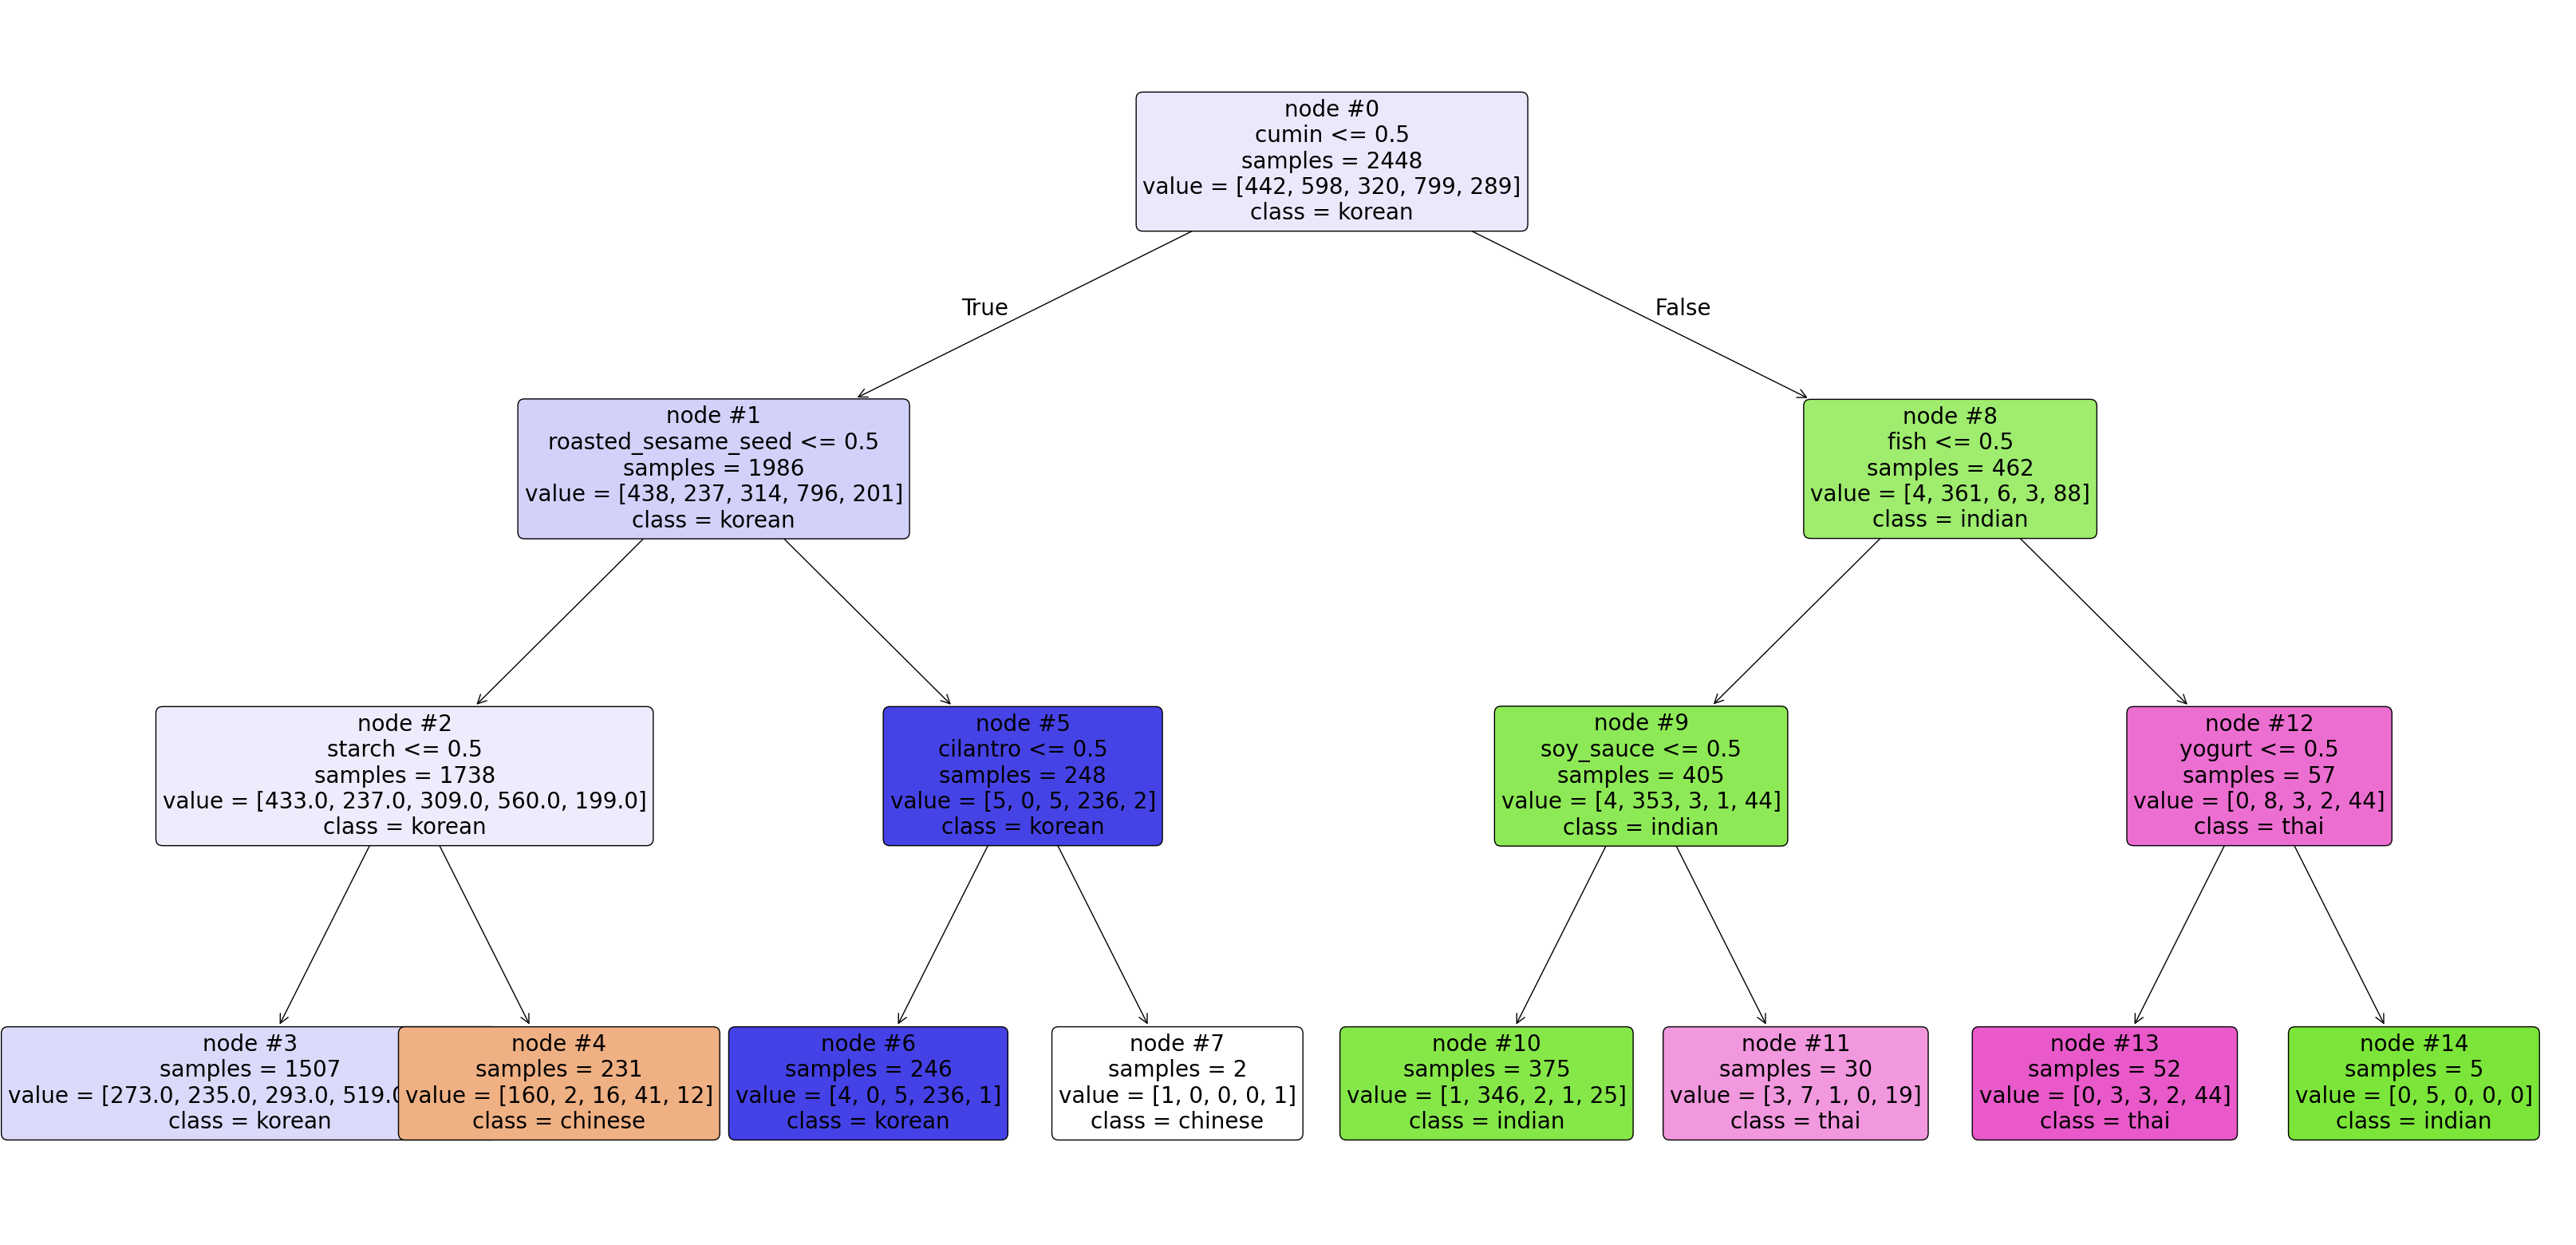

In [49]:
# graphvizライブラリを使う場合はこちらのコードを使えますが、
# ここではsklearnのplot_treeメソッドを使って決定木を可視化します。

# graphvizを使った決定木のエクスポート例（コメントアウト中）
# export_graphviz(
#     bamboo_tree,
#     feature_names=list(ingredients.columns.values),  # 特徴量名
#     out_file="bamboo_tree.dot",                       # 出力ファイル名
#     class_names=np.unique(cuisines),                  # クラス名（料理の種類）
#     filled=True,                                      # ノードの色をクラスごとに塗る
#     node_ids=True,                                    # ノードIDを表示
#     special_characters=True,                          # 特殊文字を許可
#     impurity=False,                                   # 不純度の表示をオフ
#     label="all",                                      # ラベルを全て表示
#     leaves_parallel=False                             # 葉ノードを平行に配置しない
# )

# dotファイルを読み込んでgraphvizの描画用オブジェクトを作成
# with open("bamboo_tree.dot") as bamboo_tree_image:
#     bamboo_tree_graph = bamboo_tree_image.read()
# graphviz.Source(bamboo_tree_graph)

# matplotlibのplot_treeで決定木を表示
plt.figure(figsize=(40,20))  # 図のサイズを大きく設定（ツリーのサイズに合わせて調整可能）
_ = tree.plot_tree(
    bamboo_tree,
    feature_names=list(ingredients.columns.values),  # 特徴量名
    class_names=np.unique(cuisines),                  # クラス名
    filled=True,                                      # ノードを色分け
    node_ids=True,                                    # ノード番号表示
    impurity=False,                                   # 不純度を非表示
    label="all",                                      # ラベルは全て表示
    fontsize=20,                                      # フォントサイズを大きめに
    rounded=True                                     # ノードを角丸で描画
)
plt.show()


In [50]:
bamboo = recipes[recipes.cuisine.isin(["korean", "japanese", "chinese", "thai", "indian"])]


In [51]:
bamboo["cuisine"].value_counts()

cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64

In [52]:
# set sample size
sample_n = 30

In [53]:
# take 30 recipes from each cuisine
random.seed(1234) # set random seed
bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_ingredients = bamboo_test.iloc[:,1:] # ingredients
bamboo_test_cuisines = bamboo_test["cuisine"] # corresponding cuisines or labels

C:\Users\minmi\AppData\Local\Temp\ipykernel_19312\259390036.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bamboo_test = bamboo.groupby("cuisine", group_keys=False).apply(lambda x: x.sample(sample_n))


In [54]:
# check that we have 30 recipes from each cuisine
bamboo_test["cuisine"].value_counts()

cuisine
chinese     30
indian      30
japanese    30
korean      30
thai        30
Name: count, dtype: int64

In [55]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_ingredients = bamboo_train.iloc[:,1:] # ingredients
bamboo_train_cuisines = bamboo_train["cuisine"] # corresponding cuisines or labels

In [56]:
bamboo_train["cuisine"].value_counts()

cuisine
korean      769
indian      568
chinese     412
japanese    290
thai        259
Name: count, dtype: int64

In [57]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_ingredients, bamboo_train_cuisines)

print("Decision tree model saved to bamboo_train_tree!")

Decision tree model saved to bamboo_train_tree!


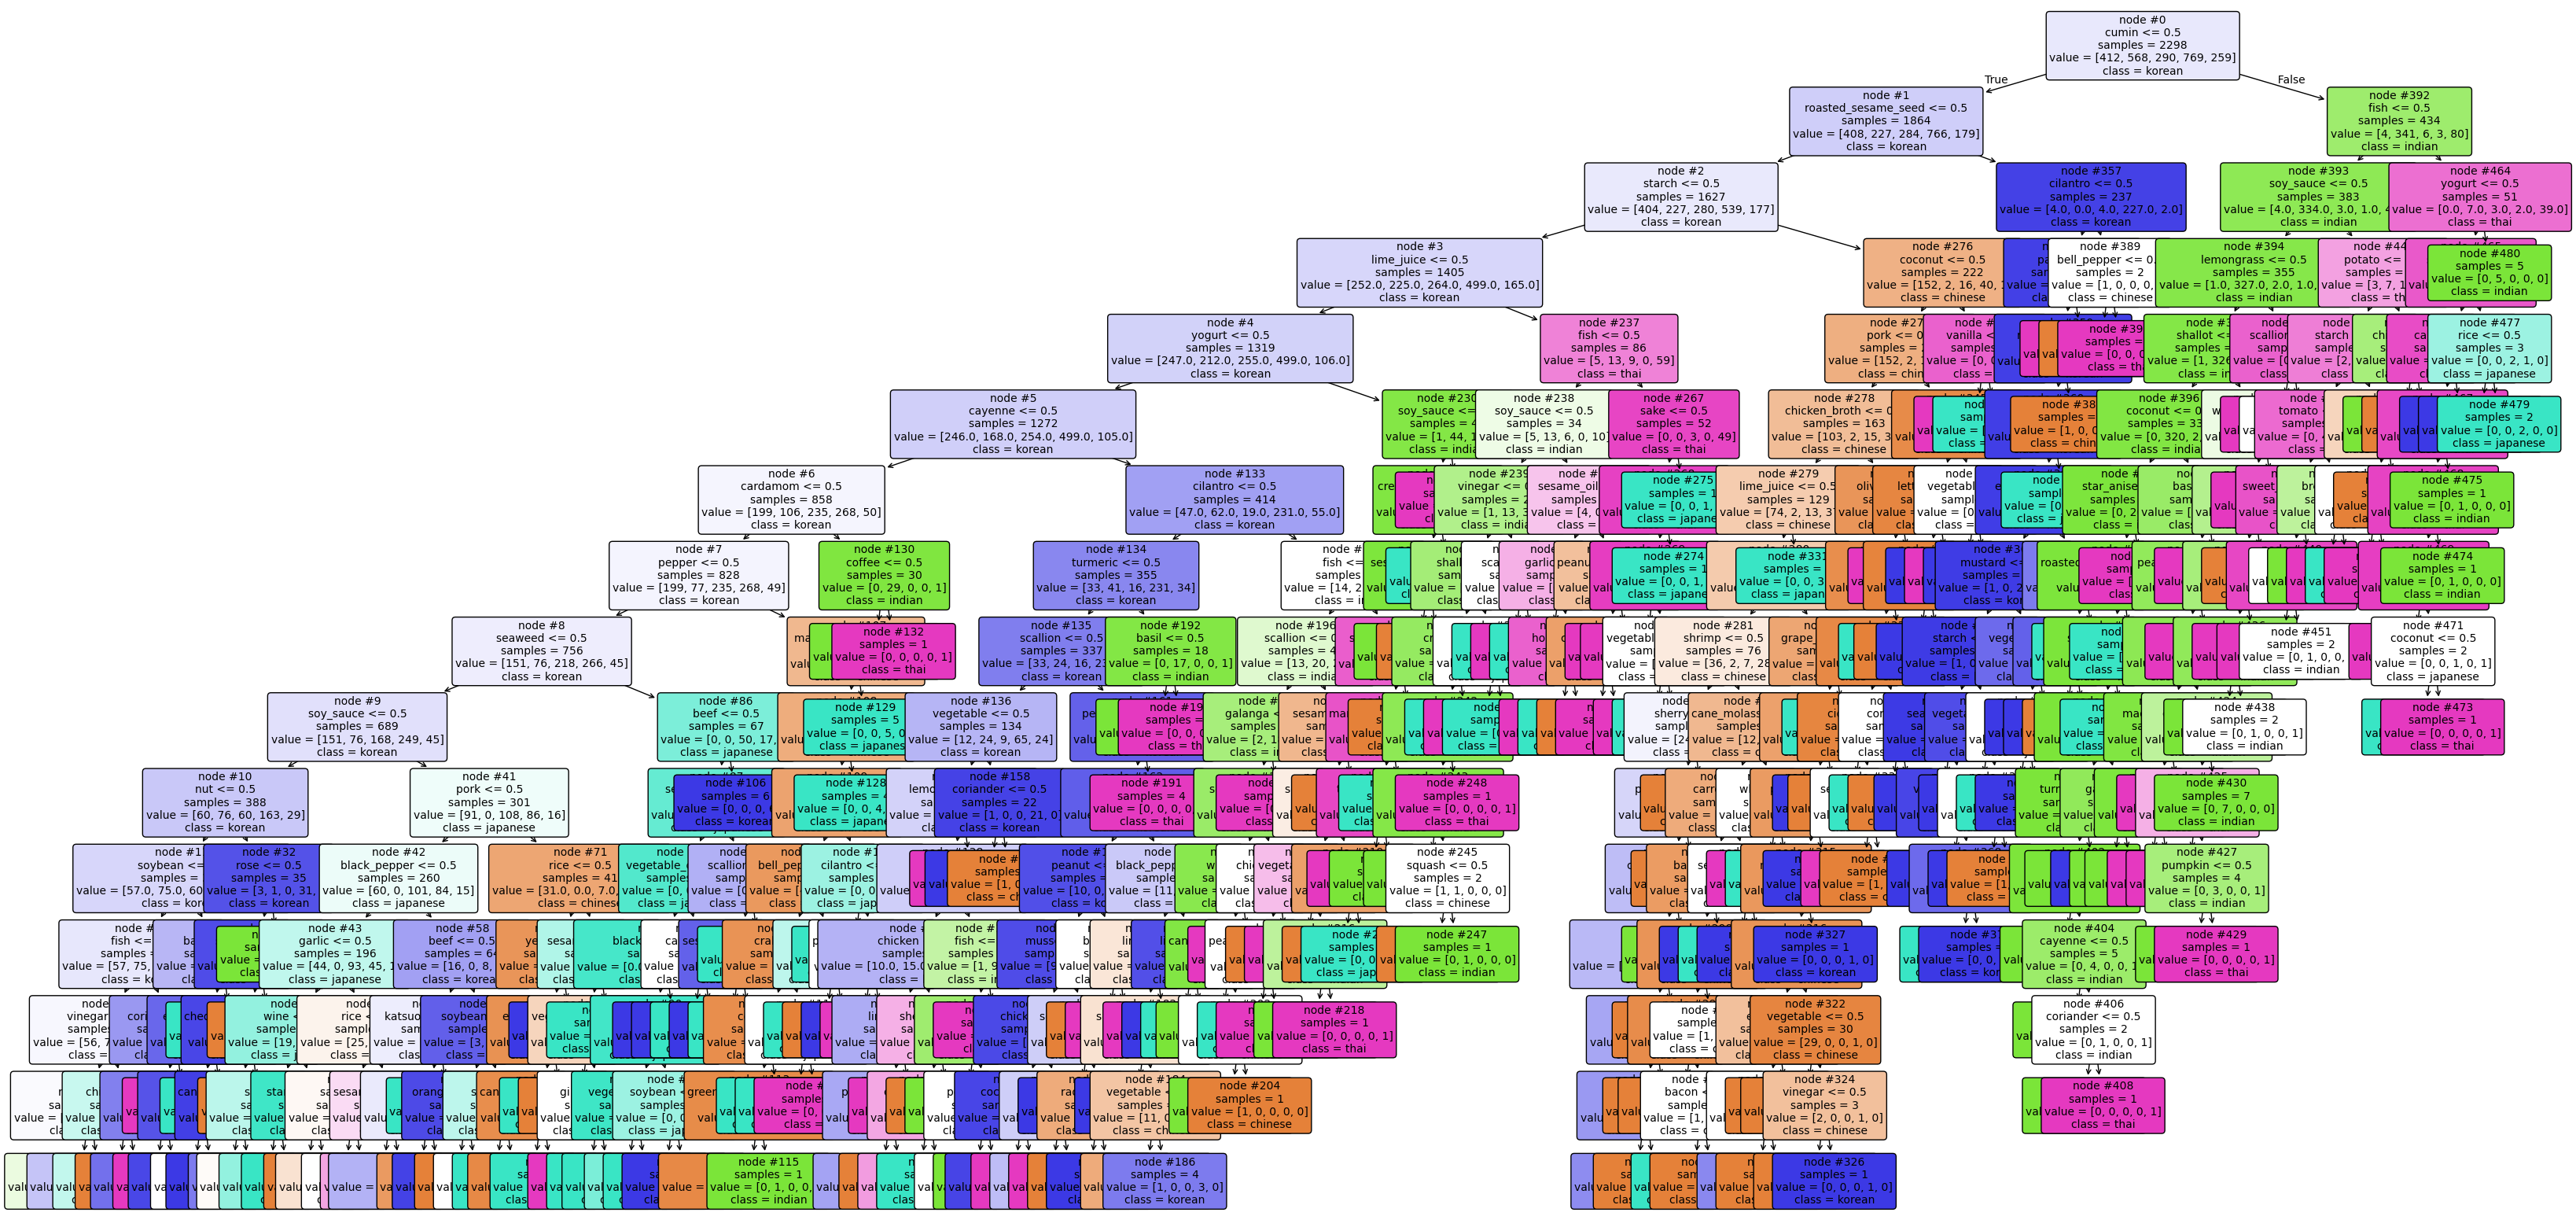

In [58]:
# export_graphviz(bamboo_train_tree,
#                 feature_names=list(bamboo_train_ingredients.columns.values),
#                 out_file="bamboo_train_tree.dot",
#                 class_names=np.unique(bamboo_train_cuisines),
#                 filled=True,
#                 node_ids=True,
#                 special_characters=True,
#                 impurity=False,
#                 label="all",
#                 leaves_parallel=False)

# with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
#     bamboo_train_tree_graph = bamboo_train_tree_image.read()
# graphviz.Source(bamboo_train_tree_graph)

plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_train_tree,
                   feature_names=list(bamboo_train_ingredients.columns.values),
                   class_names=np.unique(bamboo_train_cuisines),
                   filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=10, rounded = True)
plt.show()

In [59]:
bamboo_pred_cuisines = bamboo_train_tree.predict(bamboo_test_ingredients)

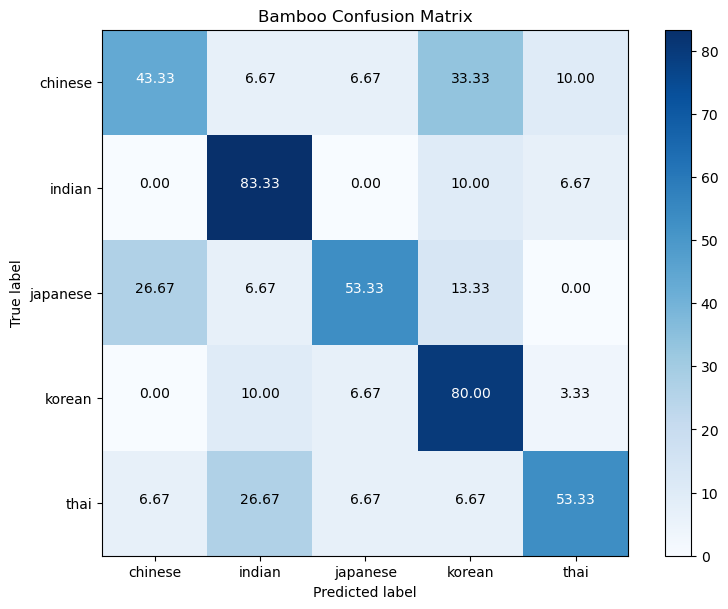

In [60]:
test_cuisines = np.unique(bamboo_test_cuisines)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_cuisines, bamboo_pred_cuisines, labels = test_cuisines)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_cuisines))
plt.xticks(tick_marks, test_cuisines)
plt.yticks(tick_marks, test_cuisines)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()